## Introduction to the Derivative: A Visual Approach in Python

In this notebook, we'll visually explore the concept of the **derivative** using Python and the `matplotlib` and `numpy` libraries. We'll see how the derivative relates to the **slope of the tangent line** of a function at a specific point.

---

### Step 1: Introduction to the Function and the Idea of Slope

Let's start with a simple function, $f(x) = x^2$. For a straight line, the slope is constant. For a curve, however, the slope changes at every point. We want to find the 'slope' of this curve at a particular point.

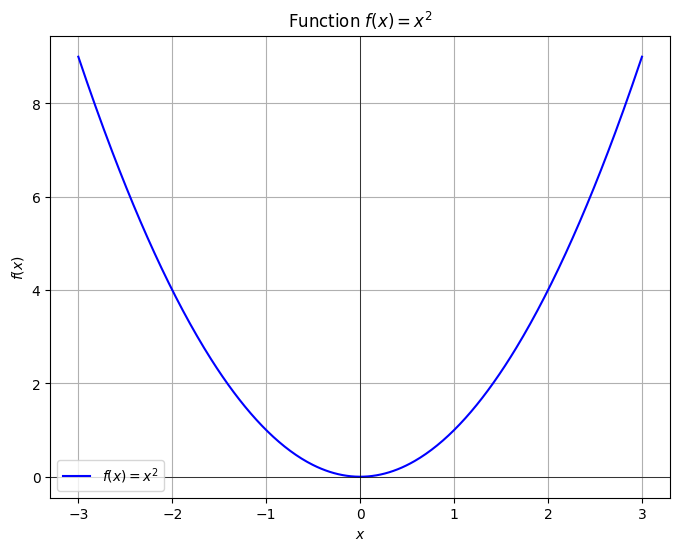

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**2

# Generate points for plotting
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')
plt.title('Function $f(x) = x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

**Explanation for students:** "You see this curve. How would we define its slope at a point, say at $x=1$?"

---

### Step 2: Introduction to the Secant Line

To approximate the slope at a point, we can take two points on the curve and draw a straight line connecting them. This is called a **secant line**. The slope of this secant will be an approximation of the function's slope.

Secant slope (between x=1 and x=2): 3.00


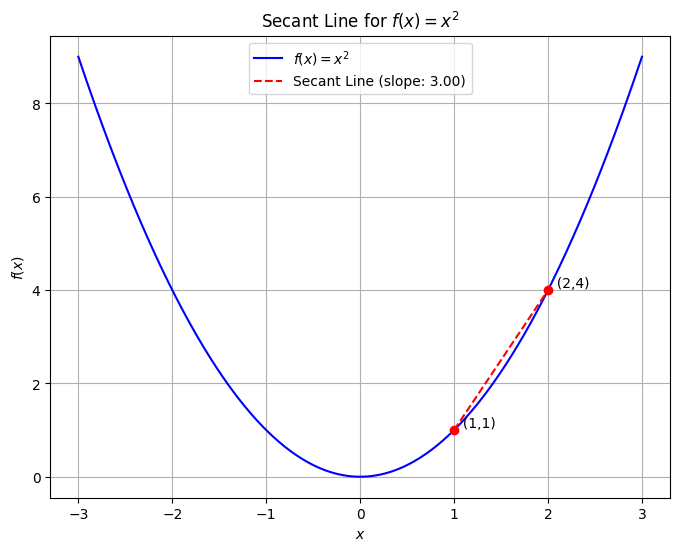

In [ ]:
# Choose a point 'a' and a point 'b' near it
a = 1
b = 2 # A point relatively far from 'a'

# Calculate the function values at these points
fa = f(a)
fb = f(b)

# Calculate the slope of the secant line
slope_secant = (fb - fa) / (b - a)

print(f"Secant slope (between x={a} and x={b}): {slope_secant:.2f}")

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')

# Plot the two points
plt.scatter([a, b], [fa, fb], color='red', zorder=5)
plt.text(a, fa, f'  ({a},{fa})', verticalalignment='bottom')
plt.text(b, fb, f'  ({b},{fb})', verticalalignment='bottom')

# Plot the secant line
x_secant = np.array([a, b])
y_secant = slope_secant * (x_secant - a) + fa
plt.plot(x_secant, y_secant, color='red', linestyle='--', label=f'Secant Line (slope: {slope_secant:.2f})')

plt.title('Secant Line for $f(x) = x^2$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()
plt.show()

**Explanation for students:** "Here we see two points on the curve and the straight line connecting them. The slope of this line gives us an idea of how 'steep' the function is over this interval."

---

### Step 3: Approaching the Tangent � Shrinking the Interval

The closer we bring the second point to the first, the better the approximation of the slope becomes. In the limit, when the interval becomes infinitesimally small, the secant line becomes the **tangent line**, and the slope of the tangent is the **derivative**.

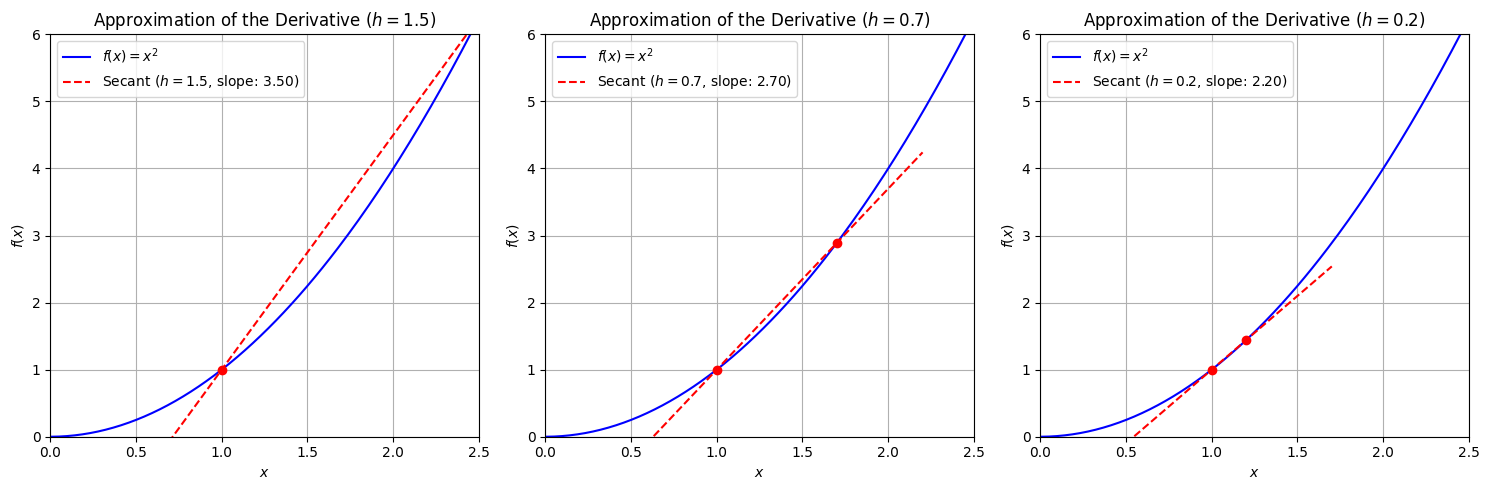

In [ ]:
# Choose a fixed point 'a'
a = 1
fa = f(a)

# Different values for 'h' (difference between the points)
h_values = [1.5, 0.7, 0.2] # Large, medium, small differences

plt.figure(figsize=(15, 5))

for i, h in enumerate(h_values):
    b = a + h
    fb = f(b)
    slope_secant = (fb - fa) / (b - a)

    plt.subplot(1, len(h_values), i + 1)
    plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')
    plt.scatter([a, b], [fa, fb], color='red', zorder=5)

    x_secant = np.array([a - 0.5, b + 0.5]) # Extend the secant for better visualization
    y_secant = slope_secant * (x_secant - a) + fa
    plt.plot(x_secant, y_secant, color='red', linestyle='--', label=f'Secant ($h={h}$, slope: {slope_secant:.2f})')

    plt.title(f'Approximation of the Derivative ($h={h}$)')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 2.5) # Focus on the area of interest
    plt.ylim(0, 6)

plt.tight_layout()
plt.show()

**Explanation for students:** "Notice how, as $h$ gets smaller, the secant line gets closer and closer to the curve at $x=1$. Think about what would happen if $h$ became infinitely small..."

---

### Step 4: The Tangent Line and the Derivative

Finally, when $h$ approaches zero, the secant transforms into a **tangent** line. The slope of this tangent line is precisely the **derivative** of the function at that specific point. For $f(x)=x^2$, the derivative is $f'(x)=2x$. So, at $x=1$, the derivative is $2$.

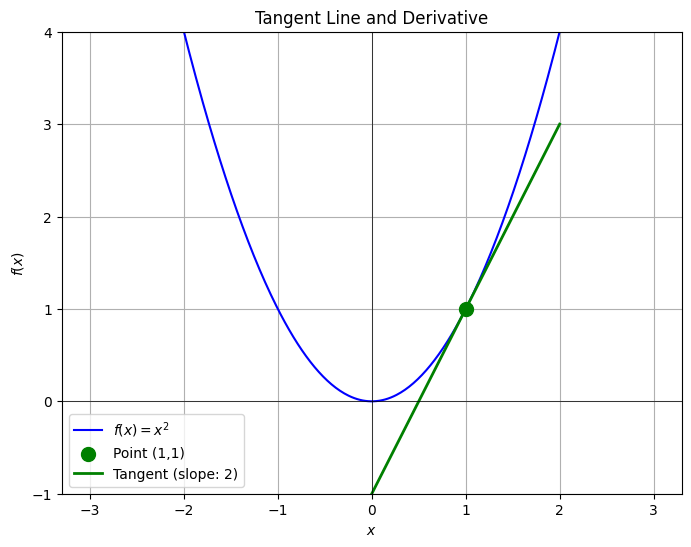

In [ ]:
# Point at which we want to calculate the derivative
x_point = 1

# Analytical derivative of f(x) = x^2 is f'(x) = 2x
# Calculate the slope of the tangent at x_point
slope_tangent = 2 * x_point

# Calculate the function value at x_point
y_point = f(x_point)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')

# Plot the point
plt.scatter([x_point], [y_point], color='green', zorder=5, s=100, label=f'Point ({x_point},{y_point})')

# Plot the tangent line
# We create points around x_point for better visualization of the tangent
tangent_x = np.linspace(x_point - 1, x_point + 1, 100)
tangent_y = slope_tangent * (tangent_x - x_point) + y_point
plt.plot(tangent_x, tangent_y, color='green', linestyle='-', linewidth=2, label=f'Tangent (slope: {slope_tangent})')

plt.title('Tangent Line and Derivative')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.ylim(-1, 4) # Adjust y-limits for better visualization
plt.show()

**Explanation for students:** "This is the tangent line at the point $x=1$. The slope of this line, which is $2$ in our case, is exactly the derivative of the function at this point. The derivative tells us the instantaneous rate of change or the 'steepness' of the function at a specific point."

---

### Step 5: Interactive Exploration with `ipywidgets`

Now, let's make our visualization interactive! We'll use `ipywidgets` to create sliders that control:

1.  The **point `a`** on the x-axis where we're calculating the derivative.
2.  The **`h` value**, which determines the distance of the second point (`b = a + h`) from `a` for the secant line. This will allow us to visually approach the limit as `h` gets closer to zero.

Observe how the secant line's slope approaches the tangent line's slope as you decrease `h`.

*(Note: The `f(x)` function definition from Step 1 is used here.)*

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Ensure the function f(x) is defined (re-define if this cell is run independently)
def f(x):
    return x**2

# Define the plotting function that will be controlled by the widgets
def plot_derivative_interactive(a, h):
    # Generate x values for the main function plot
    x_vals = np.linspace(-3, 3, 400)
    y_vals = f(x_vals)

    # Calculate values for the tangent line at 'a'
    # The derivative of f(x) = x^2 is f'(x) = 2x
    slope_tangent = 2 * a
    y_a = f(a)
    tangent_x = np.linspace(a - 1.5, a + 1.5, 100) # Extend tangent line for visibility
    tangent_y = slope_tangent * (tangent_x - a) + y_a

    # Calculate values for the secant line
    b = a + h
    y_b = f(b)

    # Handle the case where h is very close to zero to avoid division by zero
    if abs(h) < 1e-6: # If h is practically zero, secant is the tangent
        slope_secant = slope_tangent
        secant_x = tangent_x
        secant_y = tangent_y
    else:
        slope_secant = (y_b - y_a) / (b - a)
        secant_x = np.array([a, b])
        secant_y = slope_secant * (secant_x - a) + y_a

    # Create the plot
    plt.figure(figsize=(10, 7))
    plt.plot(x_vals, y_vals, label='$f(x) = x^2$', color='blue')

    # Plot the fixed point 'a' and its value
    plt.scatter([a], [y_a], color='green', zorder=5, s=100, label=f'Point a=({a:.2f},{y_a:.2f})')

    # Plot the second point 'b' (if h is not zero)
    if abs(h) >= 1e-6:
        plt.scatter([b], [y_b], color='red', zorder=5, s=100, label=f'Point b=({b:.2f},{y_b:.2f})')
        # Plot secant line (only if h is not zero)
        plt.plot(secant_x, secant_y, color='red', linestyle='--', label=f'Secant Line (slope: {slope_secant:.2f})')

    # Always plot the tangent line
    plt.plot(tangent_x, tangent_y, color='purple', linestyle='-', linewidth=2, label=f'Tangent Line (slope: {slope_tangent:.2f})')

    plt.title(f'Interactive Derivative Visualization at $x={a:.2f}$ (h={h:.2f})')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.ylim(-1, 9) # Adjust y-limits for better visualization across different 'a' values
    plt.xlim(-3, 3) # Keep x-limits consistent
    plt.show()

# Create interactive sliders for 'a' and 'h'
interactive_plot = widgets.interactive(plot_derivative_interactive,
                                      a=widgets.FloatSlider(min=-2.5, max=2.5, step=0.1, value=1.0, description='Point a'),
                                      h=widgets.FloatSlider(min=-2.0, max=2.0, step=0.05, value=1.0, description='h value'))

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Point a', max=2.5, min=-2.5), FloatSlider(value=1.0,…

---

### Supplementary Ideas and Tips:

* **Interactivity:** This notebook now includes `ipywidgets` for dynamic exploration of `a` and `h` values.
* **Other Functions:** Show examples with other functions (e.g., $f(x) = \sin(x)$, $f(x) = e^x$) to demonstrate the generality of the concept.
* **Consistent Terminology:** Consistently use the terminology (**secant**, **tangent**, **slope**, **limit**, **derivative**).
* **Applications:** Briefly explain why the derivative is important (e.g., rate of change, velocity, acceleration, optimization).
* **Limit:** Emphasize the concept of the limit in approximating the derivative ($\lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$).